In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [2]:
# we generate a dataset having 5 i/p columns and 1 o/p column and it's a classfication problem.

X,y = make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.255969,-0.652160,-1.447900,-0.650619,-0.369041,1
1,1.927021,-2.928120,-0.772817,2.332415,0.125817,0
2,0.878076,-2.207391,-1.992816,1.656349,-1.912133,1
3,4.728645,-3.471082,-0.024831,2.326709,0.376648,0
4,2.093858,-2.419018,0.202516,-0.281816,-0.213331,1


In [4]:
# function for 'Row_Sampling':-
# if we give it a dataframe and a percentage value, then it returns the (% of rows).

def sample_rows(df,percent):
    return  df.sample(int(percent*df.shape[0]),replace=True) 

# 'replace=True' → (sampling with replacement) → meaning same row can appear multiple times (like bagging in Random Forest)    

In [5]:
# function for 'Feature_Sampling' :-
# Again, we make a same function but it works on the columns.

import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))  # it means we take only for 'i/p columns'.                         
  new_df = df[cols]
  new_df['target'] = df['target']  
  return new_df

## Explanation:- 
#  df.columns.tolist() → gets all column names as a list.
#  [:-1] → excludes the last column, which is assumed to be the 'target'.
#  df.shape[1] - 1 → total number of feature columns (excluding 'target').  
#  int(percent * (df.shape[1] - 1)) → number of features to randomly sample.
#  random.sample(..., n) → randomly picks 'n features' without replacement.

In [6]:
# function for 'Combined_Sampling' :-
# Again, we make a same function but now it works on the both rows as well as columns.   

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df, col_percent)

In [7]:
# using 'sampling_rows', we create 3 data's packet for our model. 
 
df1 = sample_rows(df, 0.1)      # we pass here a dataframe and percentage value(i.e., 10%)
df2 = sample_rows(df, 0.1)
df3 = sample_rows(df, 0.1)

print("shape of df1:", df1.shape)
print("shape of df2:", df2.shape)
print("shape of df3:", df3.shape)   

shape of df1: (10, 6)
shape of df2: (10, 6)
shape of df3: (10, 6)


In [8]:
# call DecisionTreeClassifier and a make its 3 objects 

from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier() 

In [9]:
# now, it's time to train the model :-

clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

In [10]:
# Now, it's time to create the tree

from sklearn.tree import plot_tree

[Text(0.6, 0.875, 'x[3] <= 0.727\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.4, 0.625, 'x[0] <= 3.186\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.6, 0.375, 'x[4] <= 0.709\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

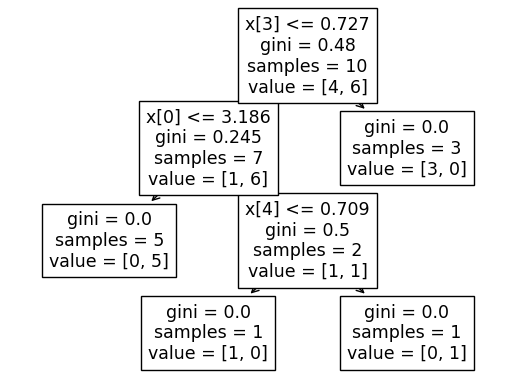

In [11]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[2] <= -2.078\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.961\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

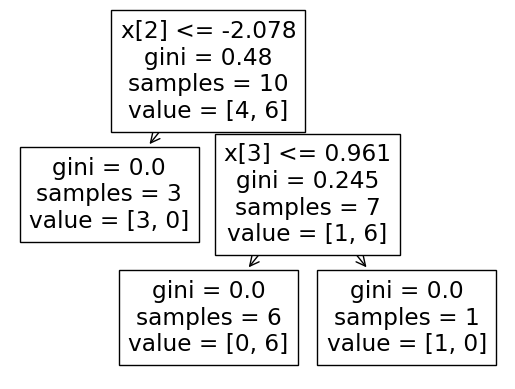

In [12]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.27\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.4, 0.5, 'x[1] <= 2.284\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

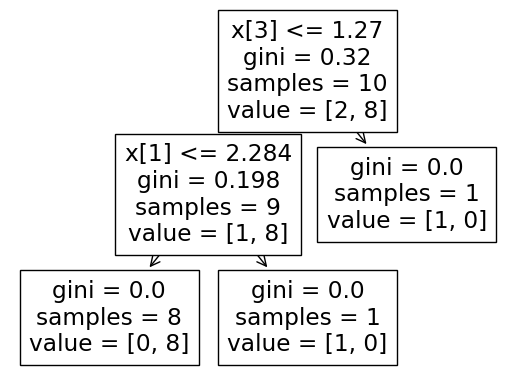

In [13]:
plot_tree(clf3)

In [14]:
# Now,let's give it a query point(Xq) and ask it to predict the output :-

# prediction by 1st model:-

clf1.predict(np.array([1.451042, -0.110773,	-1.358401, 0.077186, 0.902146]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [15]:
# prediction by 2nd model:-

clf2.predict(np.array([1.451042, -0.110773,	-1.358401, 0.077186, 0.902146]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [16]:
# prediction by 3rd model:-

clf3.predict(np.array([1.451042, -0.110773,	-1.358401, 0.077186, 0.902146]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [17]:
# so all 3 models give 3 different outputs,so go for majority one and that's our final output.

# in this case,2 modles give o/p=1,and 1 model give o/p=0, then our final output is 1. 

In [18]:
# Similarly, go for 'Column_Sampling':- 

# using 'sampling_features', we create 3 data's packet for our model. 

df4 = sample_features(df, 0.8)      # we pass here a dataframe and percentage value(i.e., 10%)
df5 = sample_features(df, 0.8)
df6 = sample_features(df, 0.8)

# it means here 0.8*(total no.of i/p columns=5)= 4 i/p columns and 1 o/p column are there,so (total=5) columns.

print(df4.shape)
print(df5.shape)
print(df6.shape)

(100, 5)
(100, 5)
(100, 5)


/tmp/ipykernel_13/3492236145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_13/3492236145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_13/3492236145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [19]:
# we can see here

print(df4.columns)
print(df5.columns)
print(df6.columns)

Index(['col4', 'col1', 'col2', 'col5', 'target'], dtype='object')
Index(['col4', 'col1', 'col2', 'col3', 'target'], dtype='object')
Index(['col5', 'col3', 'col1', 'col4', 'target'], dtype='object')


In [20]:
# Again, call DecisionTreeClassifier and a make its 3 objects 

clf4 = DecisionTreeClassifier()
clf5 = DecisionTreeClassifier()
clf6 = DecisionTreeClassifier() 

In [21]:
# b/c we have only 3 i/p column and 1 o/p column(that's why 0,1,2)
# here, take only 'i/p columns' (don't include o/p column in it)

clf4.fit(df.iloc[:,0:4],df.iloc[:,-1])   
clf5.fit(df.iloc[:,0:4],df.iloc[:,-1])   
clf6.fit(df.iloc[:,0:4],df.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.21726190476190477, 0.95, 'x[3] <= -0.839\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.09523809523809523, 0.85, 'x[1] <= 3.13\ngini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(0.047619047619047616, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3392857142857143, 0.85, 'x[0] <= 0.584\ngini = 0.415\nsamples = 68\nvalue = [48, 20]'),
 Text(0.23809523809523808, 0.75, 'x[3] <= 0.05\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.19047619047619047, 0.65, 'x[1] <= -0.759\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.14285714285714285, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23809523809523808, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2857142857142857, 0.65, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.44047619047619047, 0.75, 'x[1] <= -3.489\ngini = 0.491\nsamples = 44\nvalue = [25, 19]'),
 Text(0.39285714285714285, 0.65, 'gin

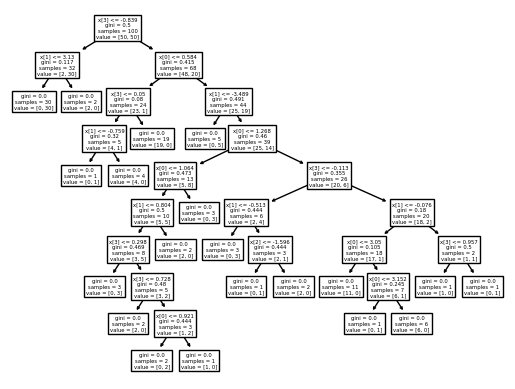

In [22]:
# it's time to create the tree

plot_tree(clf4)

[Text(0.21726190476190477, 0.95, 'x[3] <= -0.839\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.09523809523809523, 0.85, 'x[1] <= 3.13\ngini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(0.047619047619047616, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3392857142857143, 0.85, 'x[0] <= 0.584\ngini = 0.415\nsamples = 68\nvalue = [48, 20]'),
 Text(0.23809523809523808, 0.75, 'x[3] <= 0.05\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.19047619047619047, 0.65, 'x[3] <= -0.131\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.14285714285714285, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.23809523809523808, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.65, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.44047619047619047, 0.75, 'x[1] <= -3.489\ngini = 0.491\nsamples = 44\nvalue = [25, 19]'),
 Text(0.39285714285714285, 0.65, 'gin

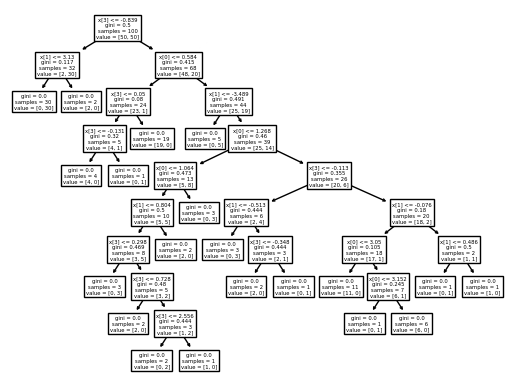

In [23]:
plot_tree(clf5)

[Text(0.21726190476190477, 0.95, 'x[3] <= -0.839\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.09523809523809523, 0.85, 'x[1] <= 3.13\ngini = 0.117\nsamples = 32\nvalue = [2, 30]'),
 Text(0.047619047619047616, 0.75, 'gini = 0.0\nsamples = 30\nvalue = [0, 30]'),
 Text(0.14285714285714285, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3392857142857143, 0.85, 'x[0] <= 0.584\ngini = 0.415\nsamples = 68\nvalue = [48, 20]'),
 Text(0.23809523809523808, 0.75, 'x[3] <= 0.05\ngini = 0.08\nsamples = 24\nvalue = [23, 1]'),
 Text(0.19047619047619047, 0.65, 'x[2] <= -0.527\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.14285714285714285, 0.55, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.23809523809523808, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2857142857142857, 0.65, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.44047619047619047, 0.75, 'x[1] <= -3.489\ngini = 0.491\nsamples = 44\nvalue = [25, 19]'),
 Text(0.39285714285714285, 0.65, 'gin

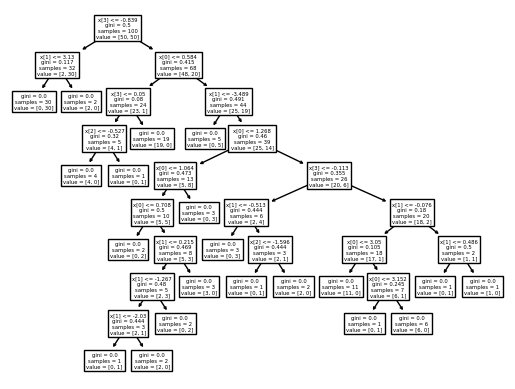

In [24]:
plot_tree(clf6)

In [25]:
df6.head()

,col5,col3,col1,col4,target
0,-0.369041,-1.447900,2.255969,-0.650619,1
1,0.125817,-0.772817,1.927021,2.332415,0
2,-1.912133,-1.992816,0.878076,1.656349,1
3,0.376648,-0.024831,4.728645,2.326709,0
4,-0.213331,0.202516,2.093858,-0.281816,1


In [26]:
clf4.predict(np.array([-1.115940, -3.020060, -0.082677,	-0.110234]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [27]:
clf5.predict(np.array([-1.115940,	-3.020060,	-0.082677,	-0.110234]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [28]:
clf6.predict(np.array([-1.115940,	-3.020060,	-0.082677,	-0.110234]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [29]:
# using 'combined_sampling', we create 3 data's packet for our model. 

df7 = combined_sampling(df,0.5,0.5)     
df8 = combined_sampling(df,0.5,0.5)
df9 = combined_sampling(df,0.5,0.5)

# so, we pass here for 50% of rows i.e,(50% of 100) = 50 rows.
# And, 50% of columns i.e., (50% of 5 i/p columns) = 2 i/p columns  + 1 o/p column => total = 3 columns.

print("shape of df7:", df7.shape)
print("shape of df8:", df8.shape)
print("shape of df9:", df9.shape)   

shape of df7: (50, 3)
shape of df8: (50, 3)
shape of df9: (50, 3)


/tmp/ipykernel_13/3492236145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_13/3492236145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
/tmp/ipykernel_13/3492236145.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [30]:
print(df7.columns)
print(df8.columns)
print(df9.columns)

Index(['col3', 'col1', 'target'], dtype='object')
Index(['col5', 'col4', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [31]:
df7

,col3,col1,target
26,-3.129890,-0.511785,0
78,-0.915212,2.048725,1
45,-0.210222,1.779947,1
53,0.243658,3.335497,1
61,0.524996,-1.889832,0
0,-1.447900,2.255969,1
12,-0.766323,0.657441,1
75,-1.447112,3.405802,0
59,1.305391,1.659805,1
54,-0.400247,0.618901,1


In [32]:
clf7 = DecisionTreeClassifier()
clf8 = DecisionTreeClassifier()
clf9 = DecisionTreeClassifier()

In [33]:
# fit the models 

clf7.fit(df7.iloc[:,0:2],df7.iloc[:,-1])
clf8.fit(df8.iloc[:,0:2],df8.iloc[:,-1])
clf9.fit(df9.iloc[:,0:2],df9.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.36666666666666664, 0.9375, 'x[1] <= -0.464\ngini = 0.48\nsamples = 50\nvalue = [20, 30]'),
 Text(0.13333333333333333, 0.8125, 'x[1] <= -0.62\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.06666666666666667, 0.6875, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2, 0.6875, 'x[1] <= -0.589\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.13333333333333333, 0.5625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.26666666666666666, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.8125, 'x[1] <= 3.152\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.4666666666666667, 0.6875, 'x[1] <= 0.794\ngini = 0.264\nsamples = 32\nvalue = [5, 27]'),
 Text(0.4, 0.5625, 'x[0] <= -2.668\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4666666666666667, 0.4375, 'x[1] <= 0.564\ngini = 0.426\nsamples = 13\nvalue = [4, 9]'),
 Text(0.3333333333333333, 0.3125, 'x[0] <= -0.752\

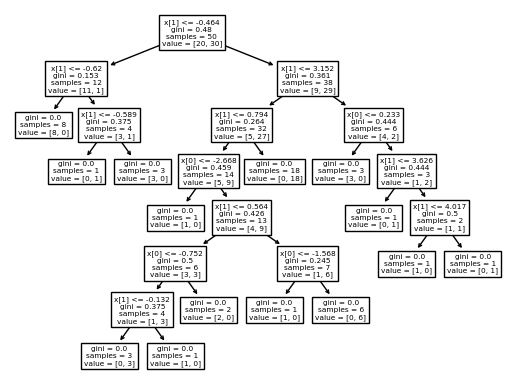

In [34]:
# Now, plot the D.T for all of the models 

plot_tree(clf7)

[Text(0.5, 0.9375, 'x[1] <= -0.902\ngini = 0.461\nsamples = 50\nvalue = [32, 18]'),
 Text(0.25, 0.8125, 'x[1] <= -3.375\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.125, 0.6875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.6875, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.75, 0.8125, 'x[0] <= -1.142\ngini = 0.301\nsamples = 38\nvalue = [31, 7]'),
 Text(0.625, 0.6875, 'x[0] <= -1.351\ngini = 0.492\nsamples = 16\nvalue = [9, 7]'),
 Text(0.5, 0.5625, 'x[0] <= -3.571\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.375, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.4375, 'x[1] <= 0.853\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.5, 0.3125, 'x[1] <= -0.149\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.375, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.625, 0.1875, 'x[0] <= -2.172\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75

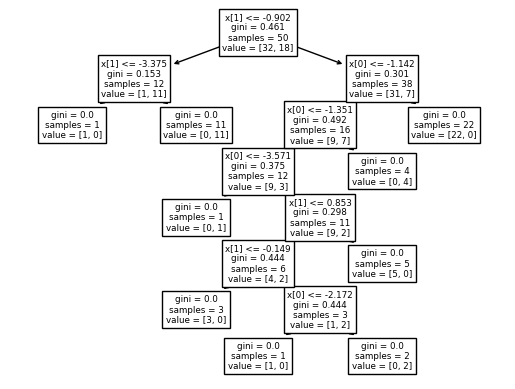

In [35]:
plot_tree(clf8)

[Text(0.35294117647058826, 0.9545454545454546, 'x[1] <= 0.881\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.29411764705882354, 0.8636363636363636, 'x[0] <= -1.269\ngini = 0.491\nsamples = 46\nvalue = [26, 20]'),
 Text(0.17647058823529413, 0.7727272727272727, 'x[0] <= -2.912\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.11764705882352941, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23529411764705882, 0.6818181818181818, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4117647058823529, 0.7727272727272727, 'x[0] <= -0.967\ngini = 0.469\nsamples = 40\nvalue = [25, 15]'),
 Text(0.35294117647058826, 0.6818181818181818, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.47058823529411764, 0.6818181818181818, 'x[1] <= -0.789\ngini = 0.486\nsamples = 36\nvalue = [21, 15]'),
 Text(0.23529411764705882, 0.5909090909090909, 'x[1] <= -2.086\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.11764705882352941, 0.5, 'x[0] <= 2.532\ngini = 0.32\n

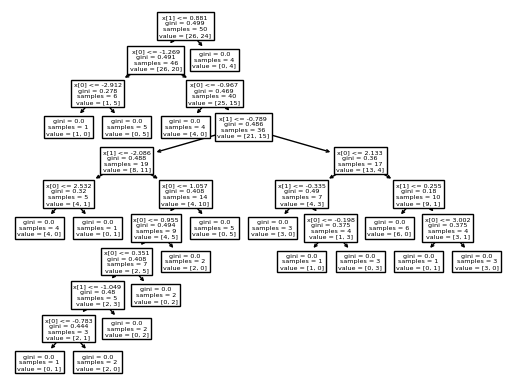

In [36]:
plot_tree(clf9)

In [37]:
clf7.predict(np.array([1.316358, -1.397414]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [38]:
clf8.predict(np.array([1.316358, -1.397414]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [39]:
clf9.predict(np.array([1.316358, -1.397414]).reshape(1,2))

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [40]:
# So,take that one which is in majority.